In [1]:
#imports and objects needed to perform analysis
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()
# reflect an existing database into a new model
base= automap_base()
# reflect the tables input #2
base.prepare(engine,reflect=True)
#saving classes. 
measurement=base.classes.measurement
station=base.classes.station
#session initiation
session=Session(engine)
base.classes.keys()

['measurement', 'station']

In [2]:
#Exploratory Climate Analysis inputs 2-11
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date = str(recent_date)[2:-3]
print(recent_date)

2017-08-23


In [3]:
year_from_recent = str(eval(recent_date[0:4])-1) + recent_date[4:]
print(year_from_recent)

2016-08-23


In [4]:
yearly_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_from_recent).filter(measurement.date <= recent_date).order_by(measurement.date).all()

In [5]:
# Save results 
yearly_prcp_df = pd.DataFrame(data=yearly_prcp)
yearly_prcp_df.set_index("date", inplace=True)
yearly_prcp_df.rename(columns={"prcp": "precipitation"}, inplace=True)
yearly_prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


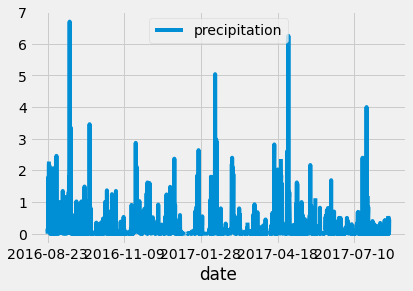

In [6]:
yearly_prcp_df.plot()
plt.legend(loc=9)
plt.savefig("precipitation_analysis.png")
plt.show()

In [7]:
yearly_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [8]:
station_count = session.query(measurement.station).distinct().count()
station_count

9

In [9]:
#most active station
activity_by_station=session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
activity_by_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [10]:
#temperature calculations of most active station id. 
temp_obs = [func.min(measurement.tobs), 
       func.max(measurement.tobs),    #some of this I had to look at the readme to get
       func.avg(measurement.tobs)]

min_max_avg_temp = session.query(*temp_obs).\
    filter(measurement.station == "USC00519281").all()
min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

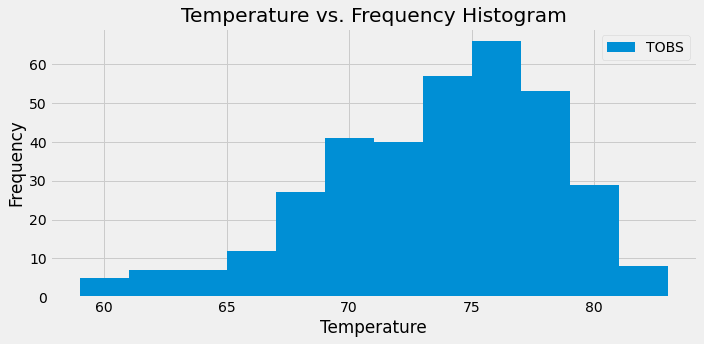

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).\
    filter(measurement.date >= year_from_recent).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

# Save the Query Results as a Pandas DataFrame
tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])

# Plot the Results as a Histogram with `bins=12`
tobs_data_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize=(10,5))
plt.xlabel("Temperature")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("Images/temperature_vs_frequency.png")
plt.show()